In [2]:
# ---------------------------------------------------------------
# MathSem Variation
# Author: Baris Catan
# Date: 12.08.2024
# ---------------------------------------------------------------
from sympy import symbols, Eq, diff, Integral, pi, sin, cos, sqrt, lambdify, nsolve, latex
import numpy as np
import scipy.integrate as sc

x, l_m, grad = symbols("x lambda grad")

l = symbols("L")

n = 2 #anzahl koeffizienten, probiere 5, update initial_guesses = [1.8,0.3,0.1,0.05,0.01,-11]
l = 5 #np.pi**2/2

coefficients = symbols(' '.join([f'a_{i+1}' for i in range(n)]))

inner = sum(coefficients[i] * sin((2*i+1) * x) for i in range(n))

inner

a_1*sin(x) + a_2*sin(3*x)

In [3]:
lam_inner = lambdify((coefficients,(x)),inner,modules=["numpy"])

f1 = Integral(inner, (x,0,pi))**2

#print(latex(f1))
f1

Integral(a_1*sin(x) + a_2*sin(3*x), (x, 0, pi))**2

In [4]:
inner_nb1 = diff(inner, x)
len_int = sqrt(1+(inner_nb1)**2)

nb1_int = Integral(len_int, (x,0,pi))

lam_nb1int = lambdify((coefficients,(x)), len_int, modules=["numpy"])

nb1 = nb1_int-l

nb1

Integral(sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi)) - 5

In [5]:
nbeq = Eq(0,nb1)
nbeq

Eq(0, Integral(sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi)) - 5)

In [6]:
f1_x_derivative = diff(f1, x)

f1_a_derivatives = [diff(f1, a) for a in coefficients]

for der in f1_a_derivatives:
    display(der)

2*Integral(a_1*sin(x) + a_2*sin(3*x), (x, 0, pi))*Integral(sin(x), (x, 0, pi))

2*Integral(a_1*sin(x) + a_2*sin(3*x), (x, 0, pi))*Integral(sin(3*x), (x, 0, pi))

In [7]:
f1_x_derivative

0

In [8]:
nb1_x_derivative = diff(f1, x)

nb1_a_derivatives = [diff(nb1, a) for a in coefficients]

for der in nb1_a_derivatives:
    display(der)

Integral((a_1*cos(x) + 3*a_2*cos(3*x))*cos(x)/sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi))

Integral(3*(a_1*cos(x) + 3*a_2*cos(3*x))*cos(3*x)/sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi))

In [9]:
nb1_x_derivative

0

In [10]:
equations = [Eq(f1_deriv, -l_m * nb1_deriv) for f1_deriv, nb1_deriv in zip(f1_a_derivatives, nb1_a_derivatives)]
equations.append(nbeq)

for eq in equations:
    display(eq)

Eq(2*Integral(a_1*sin(x) + a_2*sin(3*x), (x, 0, pi))*Integral(sin(x), (x, 0, pi)), -lambda*Integral((a_1*cos(x) + 3*a_2*cos(3*x))*cos(x)/sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi)))

Eq(2*Integral(a_1*sin(x) + a_2*sin(3*x), (x, 0, pi))*Integral(sin(3*x), (x, 0, pi)), -lambda*Integral(3*(a_1*cos(x) + 3*a_2*cos(3*x))*cos(3*x)/sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi)))

Eq(0, Integral(sqrt((a_1*cos(x) + 3*a_2*cos(3*x))**2 + 1), (x, 0, pi)) - 5)

In [11]:
initial_guesses = [1.8,0.3,-4]  # startewerte muessen in der naehe sein!

solutions = nsolve(equations, coefficients + (l_m,), initial_guesses)

for coeff, sol in zip(coefficients, solutions):
    print(f'{coeff} = {sol}')

print(f'lambda = {solutions[-1]}')

a_1 = 1.85746804542343
a_2 = 0.203223851278379
lambda = -10.8438777363275


a_1*sin(x) + a_2*sin(3*x)

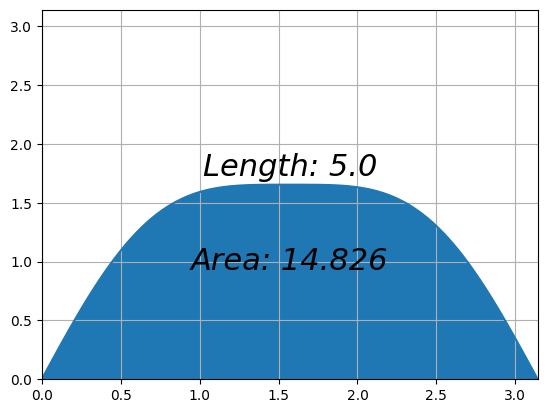

In [12]:
import matplotlib.pyplot as plt

x_vals = np.linspace(0, np.pi, 300)

y_vals = lam_inner(solutions[:-1], x_vals)

y_vals=np.array(y_vals,dtype=float)

plt.plot(x_vals,y_vals)
plt.grid()
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)

subs = dict(zip(coefficients,solutions[:-1]))
area = round(f1.doit().evalf(subs=subs),3)
length, err = sc.quad(lambda x: lam_nb1int(np.array(solutions[:-1],dtype=float), x), 0, np.pi)

plt.fill_between(x_vals, y_vals)
plt.text(np.pi/2, 1, f'Area: {area}', ha="center", va="center", fontsize = 22, style="oblique")
plt.text(np.pi/2, 1.8, f'Length: {round(length,2)}', ha="center", va="center", fontsize = 22, style="oblique")

inner